In [1]:
import pandas as pd
df_raw = pd.read_excel('Q4_2013_Groupon_North_America_Data_XLSX.xlsx', 'Q4 2013 Raw Data')
df_Local = df_raw[df_raw['Segment'] == 'Local']
df_Goods = df_raw[df_raw['Segment'] == 'Goods']
df_Travel = df_raw[df_raw['Segment'] == 'Travel']

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
Local_Billings = df_Local.groupby('Start Date')['Start Date', 'Billings'].sum()

In [4]:
data = Local_Billings['2013-09-01':'2013-10-19']

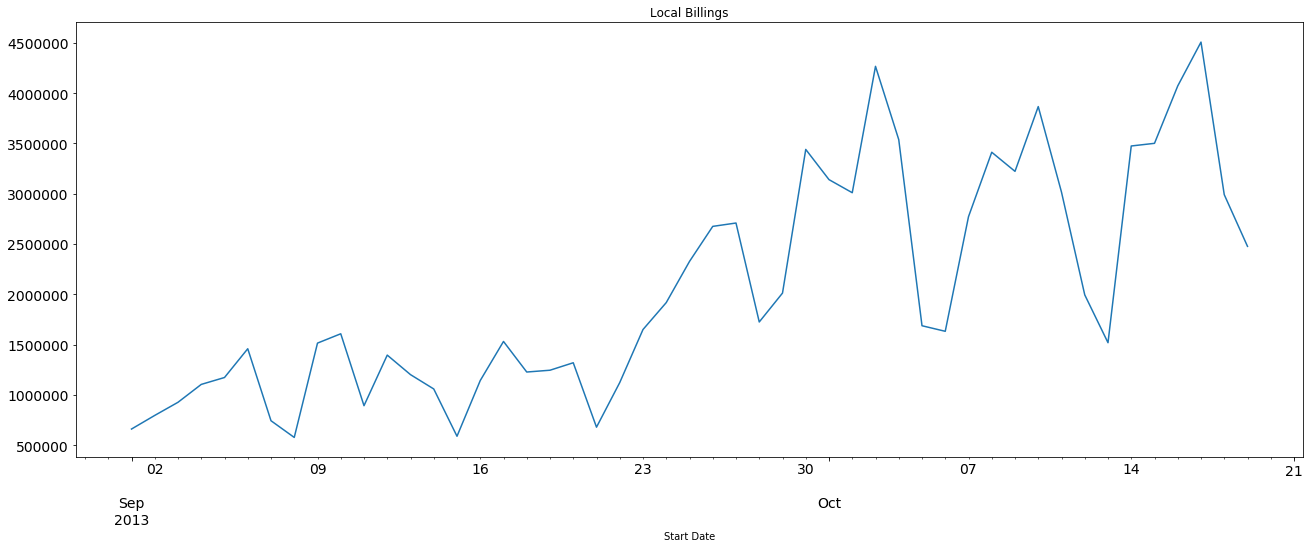

In [5]:
data.Billings.plot(figsize=(22,8), title= 'Local Billings', fontsize=14)
plt.savefig('Local_Billings.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

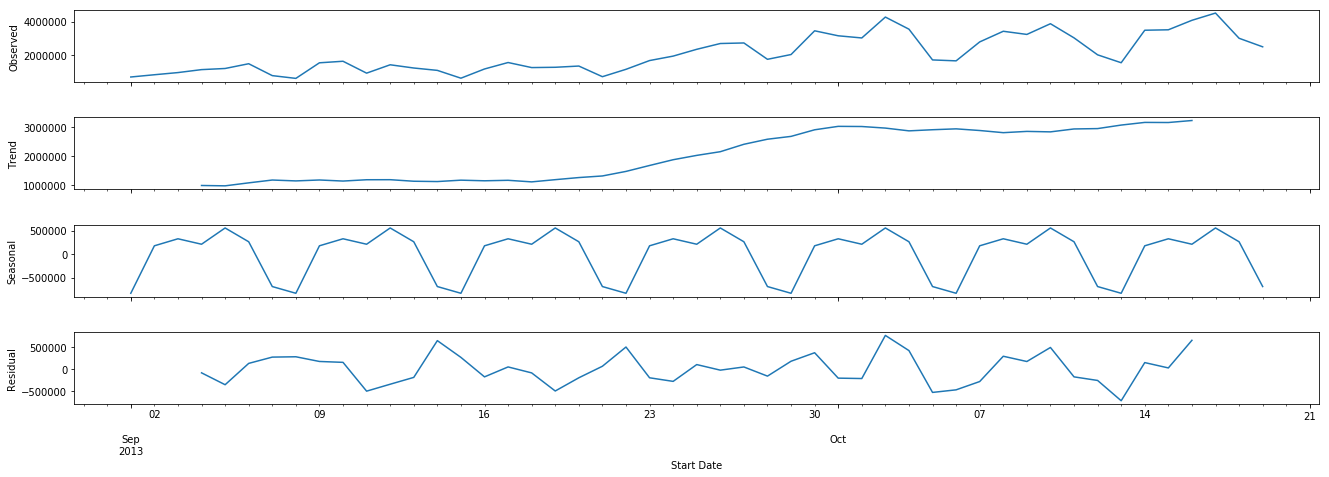

In [6]:
decomposition = seasonal_decompose(data.Billings, freq=7)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(22, 8)

In [7]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(22, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

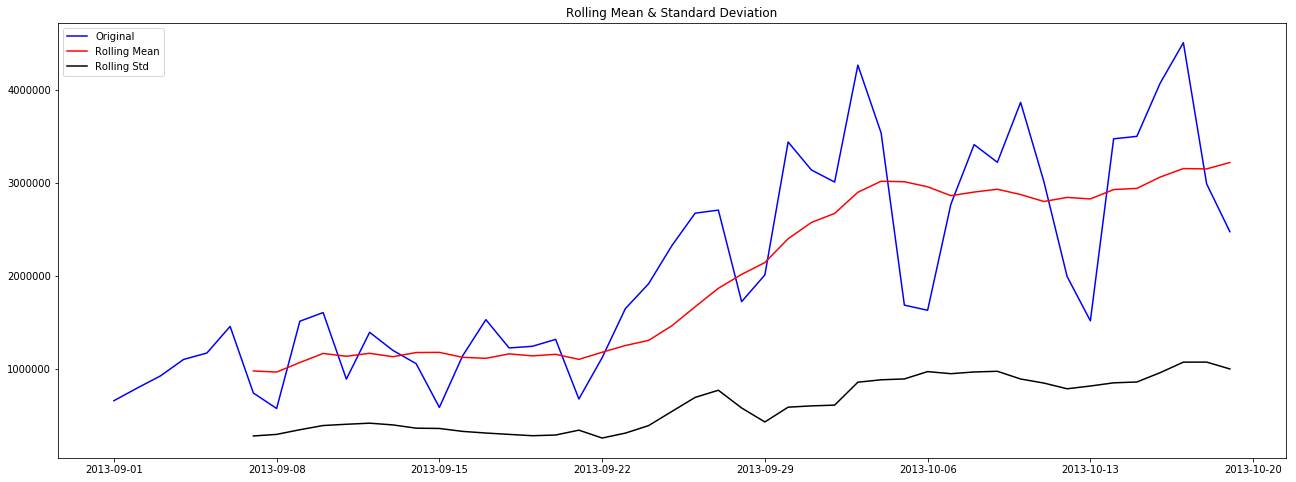

Results of Dickey-Fuller Test:
Test Statistic                 -0.493765
p-value                         0.893227
#Lags Used                      8.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64


In [8]:
test_stationarity(data.Billings)

/Users/vicky/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


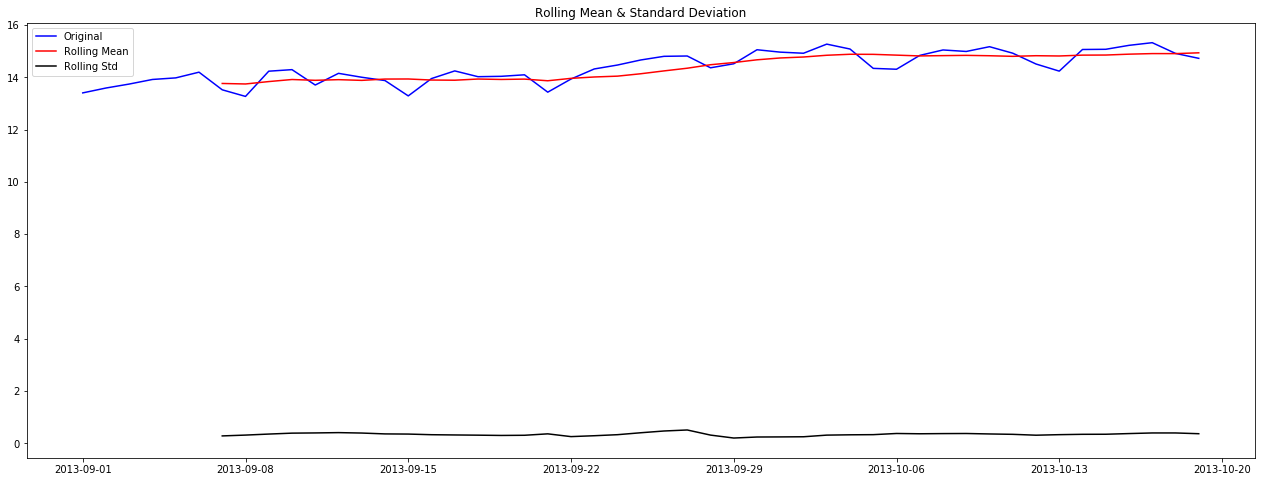

Results of Dickey-Fuller Test:
Test Statistic                 -0.676594
p-value                         0.852720
#Lags Used                      8.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64


In [9]:
data.Billings_log = data.Billings.apply(lambda x: np.log(x))  
test_stationarity(data.Billings_log)

/Users/vicky/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


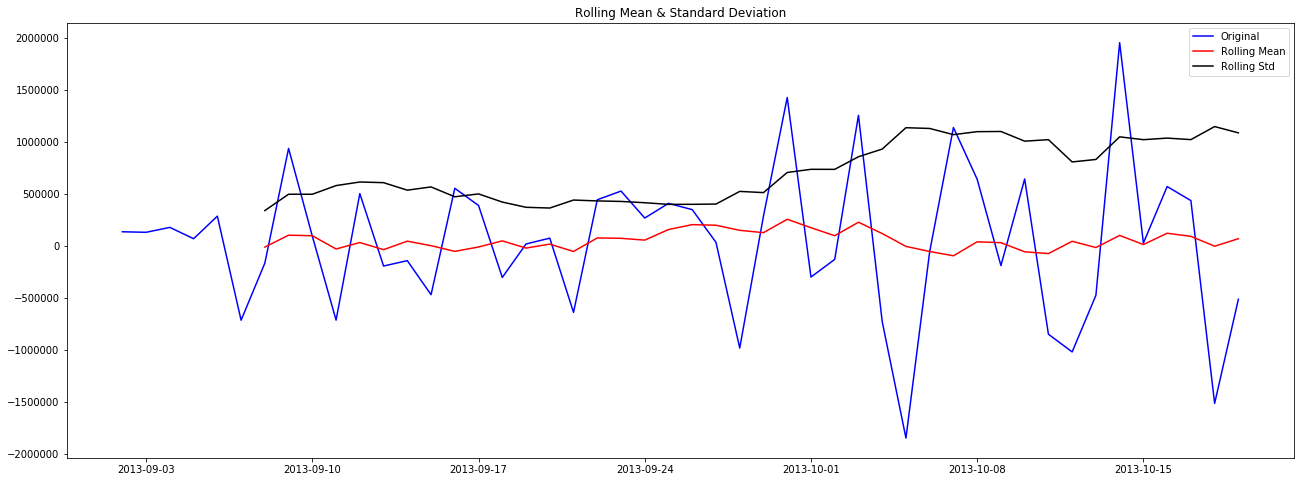

Results of Dickey-Fuller Test:
Test Statistic                 -1.771613
p-value                         0.394643
#Lags Used                      7.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64


In [10]:
data['first_difference'] = data.Billings - data.Billings.shift(1)  
test_stationarity(data.first_difference.dropna(inplace=False))

/Users/vicky/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


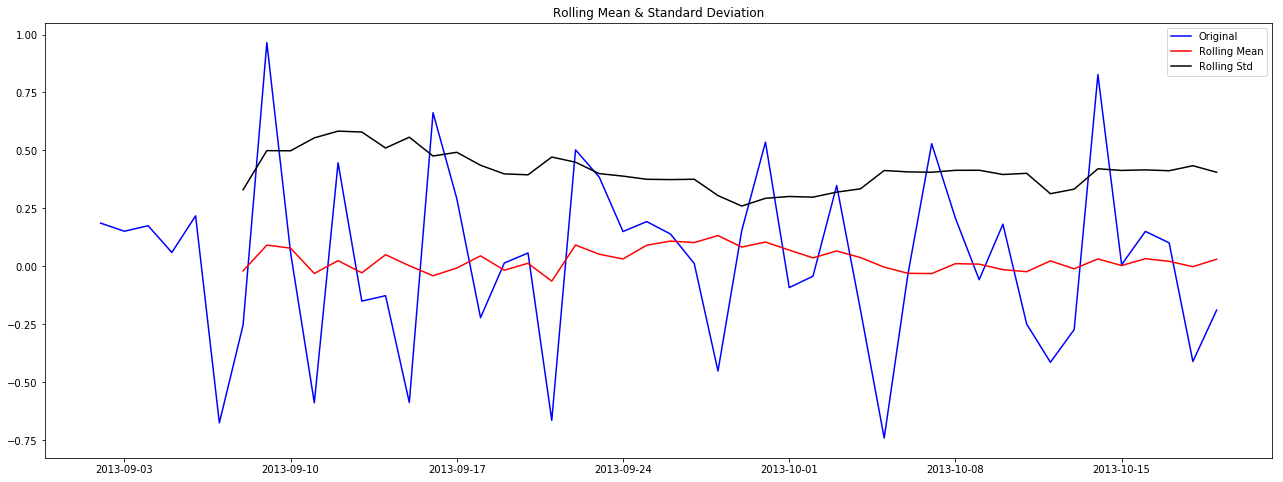

Results of Dickey-Fuller Test:
Test Statistic                 -1.831369
p-value                         0.365003
#Lags Used                      7.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64


In [11]:
data['log_first_difference'] = data.Billings_log - data.Billings_log.shift(1)  
test_stationarity(data.log_first_difference.dropna(inplace=False))

/Users/vicky/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


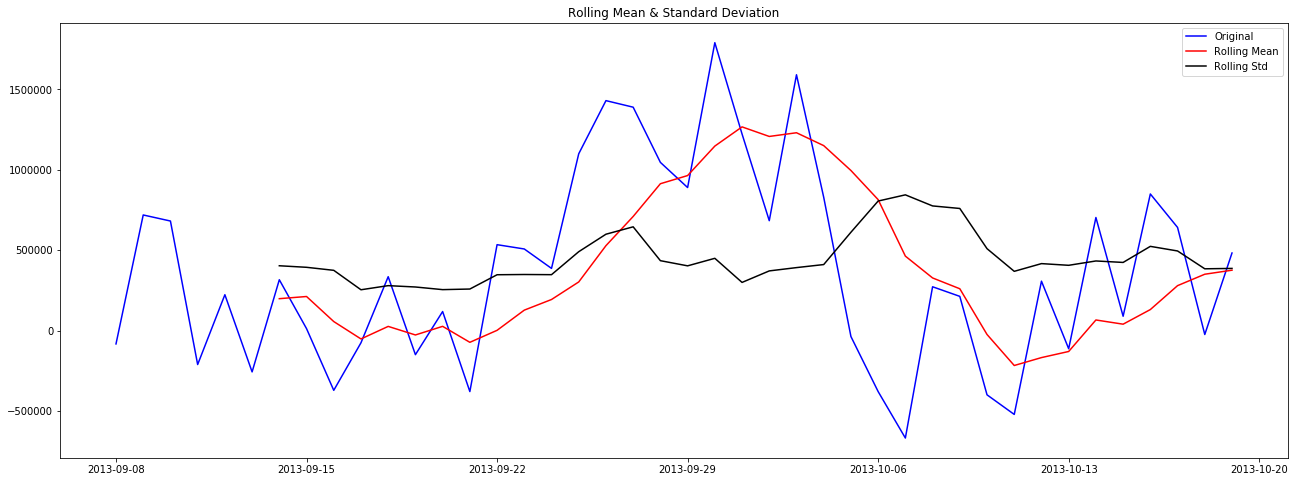

Results of Dickey-Fuller Test:
Test Statistic                 -3.247368
p-value                         0.017401
#Lags Used                      8.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


In [12]:
data['seasonal_difference'] = data.Billings - data.Billings.shift(7)  
test_stationarity(data.seasonal_difference.dropna(inplace=False))

/Users/vicky/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


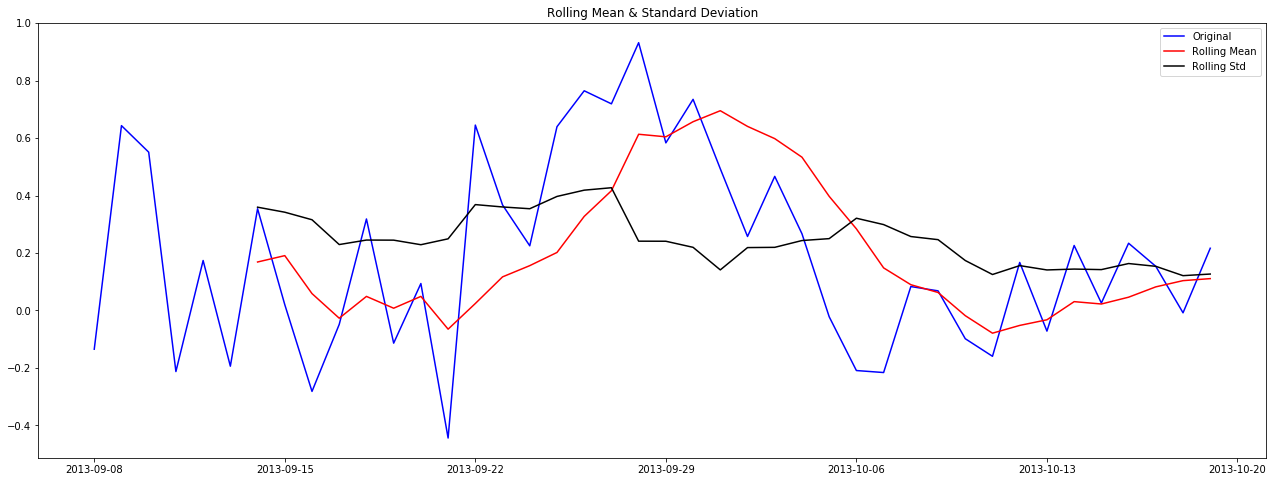

Results of Dickey-Fuller Test:
Test Statistic                 -2.713955
p-value                         0.071654
#Lags Used                      8.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


In [13]:
data['log_seasonal_difference'] = data.Billings_log - data.Billings_log.shift(7)  
test_stationarity(data.log_seasonal_difference.dropna(inplace=False))

/Users/vicky/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


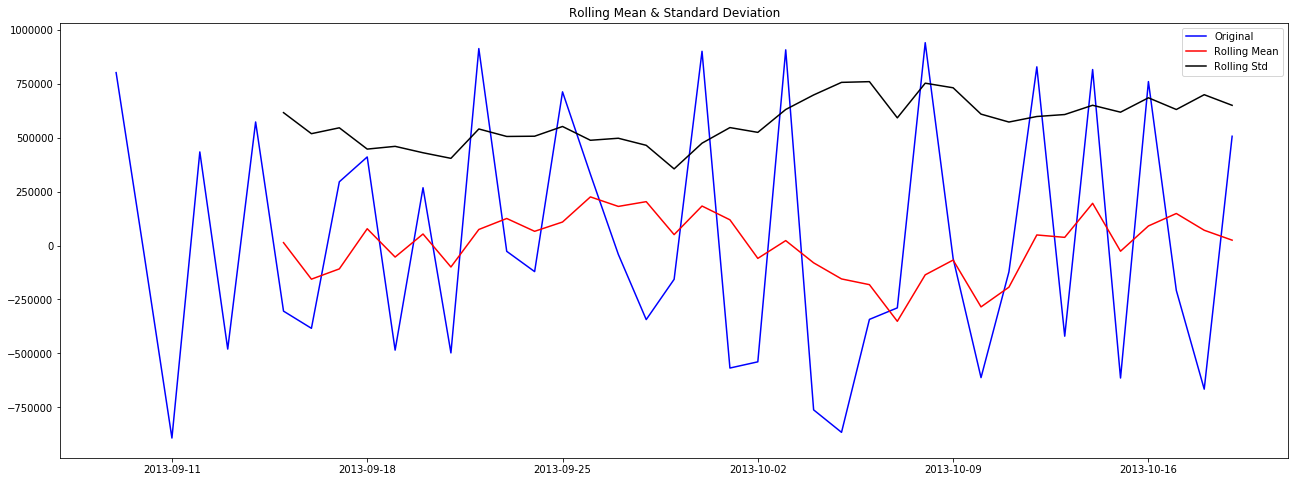

Results of Dickey-Fuller Test:
Test Statistic                -8.999948e+00
p-value                        6.538471e-15
#Lags Used                     0.000000e+00
Number of Observations Used    4.000000e+01
Critical Value (1%)           -3.605565e+00
Critical Value (5%)           -2.937069e+00
Critical Value (10%)          -2.606986e+00
dtype: float64


In [14]:
data['seasonal_first_difference'] = data.first_difference - data.first_difference.shift(7)  
test_stationarity(data.seasonal_first_difference.dropna(inplace=False))

/Users/vicky/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


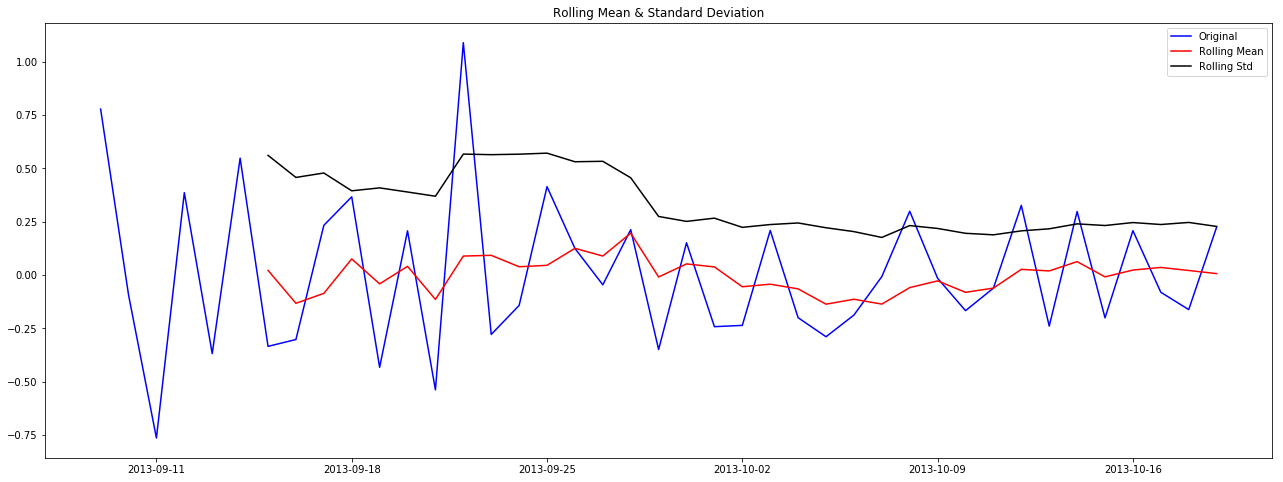

Results of Dickey-Fuller Test:
Test Statistic                 -2.755552
p-value                         0.064909
#Lags Used                      9.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [15]:
data['log_seasonal_first_difference'] = data.log_first_difference - data.log_first_difference.shift(7)  
test_stationarity(data.log_seasonal_first_difference.dropna(inplace=False))

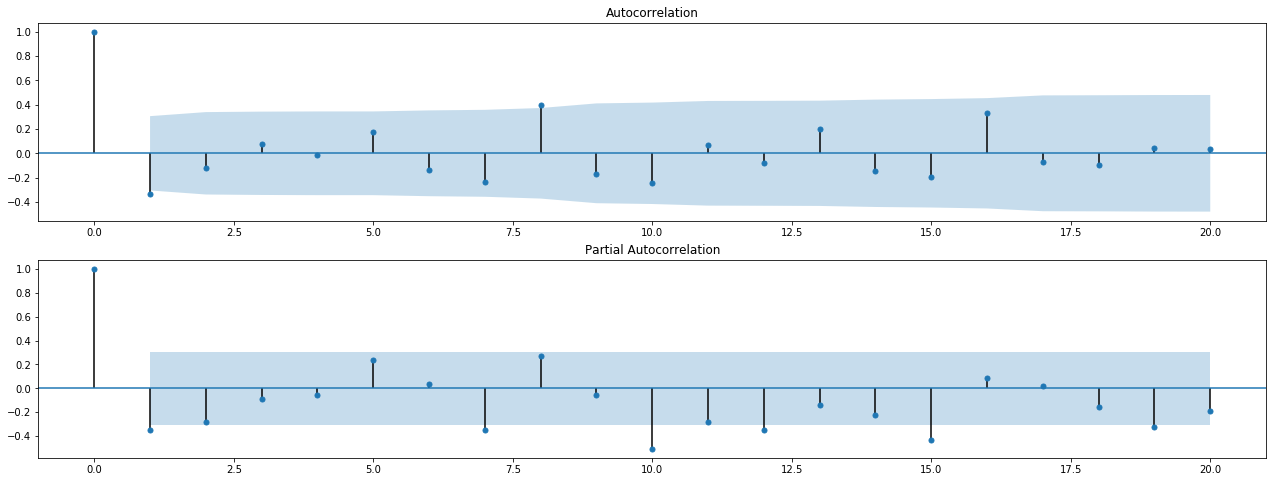

In [16]:
fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.seasonal_first_difference.iloc[8:], lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data.seasonal_first_difference.iloc[8:], lags=20, ax=ax2)

In [17]:
mod = sm.tsa.statespace.SARIMAX(data.Billings, trend='n', order=(0,1,0), seasonal_order=(0,1,1,7))
results = mod.fit()
print (results.summary())

                                 Statespace Model Results                                
Dep. Variable:                          Billings   No. Observations:                   49
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 7)   Log Likelihood                -599.473
Date:                           Tue, 04 Sep 2018   AIC                           1202.946
Time:                                   21:39:39   BIC                           1206.373
Sample:                               09-01-2013   HQIC                          1204.194
                                    - 10-19-2013                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L7       -0.4188      0.265     -1.581      0.114      -0.938       0.101
sigma2      3.789e+11    1.9e-13      2e+24

/Users/vicky/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


/Users/vicky/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


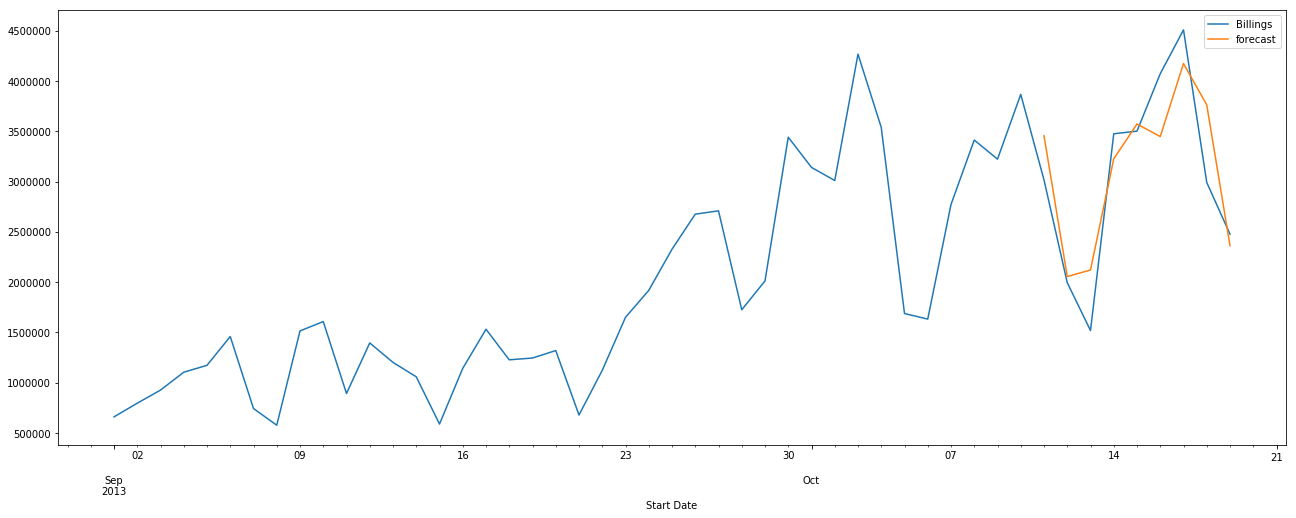

In [18]:
data['forecast'] = results.predict(start = 40, end= 49, dynamic= True) 
data[['Billings', 'forecast']].plot(figsize=(22, 8))

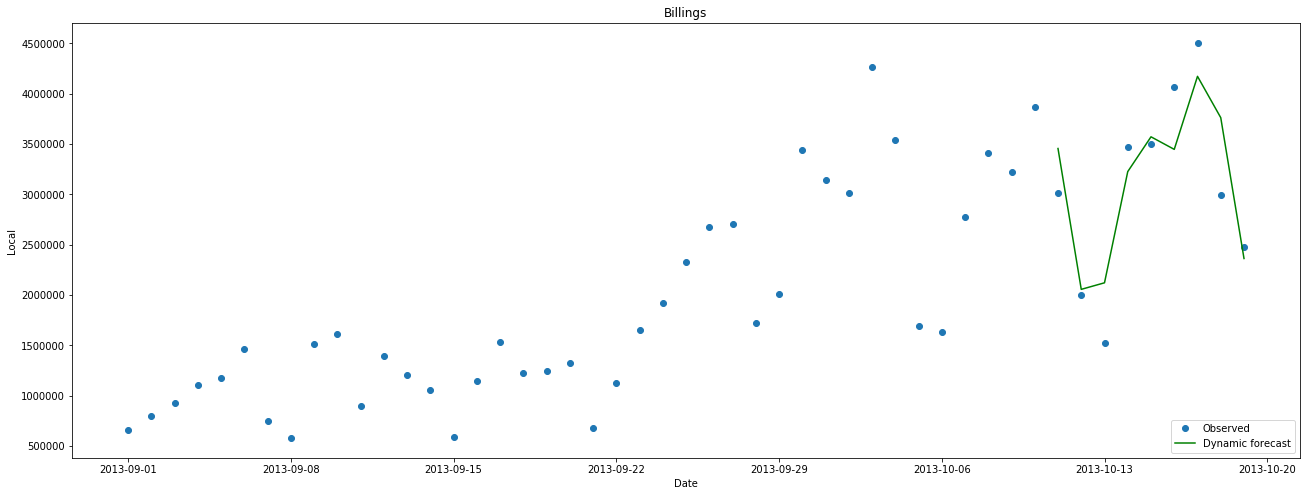

In [19]:
npredict = data.Billings['2013-09-01':].shape[0]
fig, ax = plt.subplots(figsize=(22,8))
npre = 7
ax.set(title='Billings', xlabel='Date', ylabel='Local')
ax.plot(data.index[-npredict-npre+1:], data.iloc[-npredict-npre+1:]['Billings'], 'o', label='Observed')
ax.plot(data.index[-npredict-npre+1:], data.iloc[-npredict-npre+1:]['forecast'], 'g', label='Dynamic forecast')
legend = ax.legend(loc='lower right')
legend.get_frame().set_facecolor('w')
#plt.savefig('ts_predict_compare.png', bbox_inches='tight')

In [20]:
start  =  datetime.datetime.strptime("2013-10-20", "%Y-%m-%d")
date_list = [start + relativedelta(days=x) for x in range(0,20)]
future = pd.DataFrame(index=date_list, columns= data.columns)
data = pd.concat([data, future])

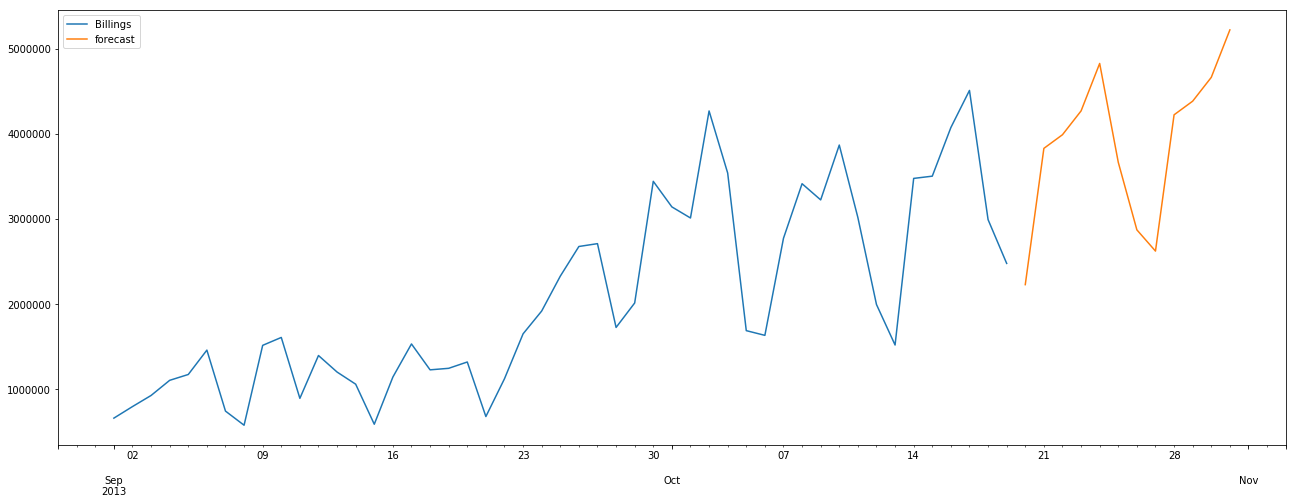

In [21]:
data['forecast'] = results.predict(start = 49, end = 60, dynamic= True)  
data[['Billings', 'forecast']].plot(figsize=(22, 8)) 
#plt.savefig('ts_predict_future.png', bbox_inches='tight')

In [22]:
data

,Billings,first_difference,log_first_difference,seasonal_difference,log_seasonal_difference,seasonal_first_difference,log_seasonal_first_difference,forecast
2013-09-01,6.607904e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-02,7.963350e+05,1.355445e+05,0.186583,NaN,NaN,NaN,NaN,NaN
2013-09-03,9.268435e+05,1.305085e+05,0.151765,NaN,NaN,NaN,NaN,NaN
2013-09-04,1.104587e+06,1.777438e+05,0.175442,NaN,NaN,NaN,NaN,NaN
2013-09-05,1.173147e+06,6.855923e+04,0.060218,NaN,NaN,NaN,NaN,NaN
2013-09-06,1.459212e+06,2.860653e+05,0.218207,NaN,NaN,NaN,NaN,NaN
2013-09-07,7.433991e+05,-7.158128e+05,-0.674419,NaN,NaN,NaN,NaN,NaN
2013-09-08,5.773694e+05,-1.660297e+05,-0.252751,-8.342101e+04,-0.134954,NaN,NaN,NaN
2013-09-09,1.515168e+06,9.377988e+05,0.964799,7.188332e+05,0.643262,802254.2235,0.778216,NaN
2013-09-10,1.607966e+06,9.279752e+04,0.059443,6.811222e+05,0.550940,-37711.0285,-0.092321,NaN


In [23]:
data['forecast']['2013-10-20':'2013-10-30'].sum()

41557108.592442185

In [115]:
estimate = data['forecast']['2013-10-20':'2013-10-30']

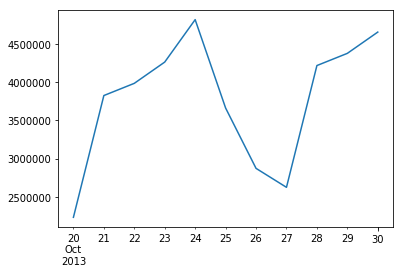

In [140]:
estimate.plot()

In [24]:
from fbprophet import Prophet

In [141]:
dataf = Local_Billings['2013-01-01':'2013-12-31']

In [142]:
dataf.head()

,Billings
Start Date,
2013-01-01,133671.4000
2013-01-02,87383.1355
2013-01-03,199138.1000
2013-01-04,89798.5000
2013-01-05,115552.3750


In [143]:
est = estimate.reset_index()
est.columns=['ds', 'y']

In [144]:
dataf.reset_index(inplace=True)
dataf.columns = ['ds', 'y']

In [145]:
dataf.set_index('ds', inplace=True)
dataf.head()

,y
ds,
2013-01-01,133671.4000
2013-01-02,87383.1355
2013-01-03,199138.1000
2013-01-04,89798.5000
2013-01-05,115552.3750


In [146]:
est.set_index('ds', inplace=True)
est.head()

,y
ds,
2013-10-20,2.227903e+06
2013-10-21,3.827660e+06
2013-10-22,3.987888e+06
2013-10-23,4.267343e+06
2013-10-24,4.824704e+06


In [147]:
dataf1 = pd.concat([dataf, est])

In [148]:
dataforecast = dataf1.reset_index()

In [149]:
model = Prophet(daily_seasonality=True)
model.fit(dataforecast)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/vicky/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [150]:
future = model.make_future_dataframe(periods=90)
future.tail()

,ds
450,2014-03-27
451,2014-03-28
452,2014-03-29
453,2014-03-30
454,2014-03-31


In [151]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
450,2014-03-27,3.221339e+06,2.244154e+06,4.226177e+06
451,2014-03-28,3.158876e+06,2.182102e+06,4.167847e+06
452,2014-03-29,2.650727e+06,1.669018e+06,3.630408e+06
453,2014-03-30,2.589856e+06,1.598655e+06,3.613669e+06
454,2014-03-31,3.084363e+06,2.091375e+06,4.059499e+06


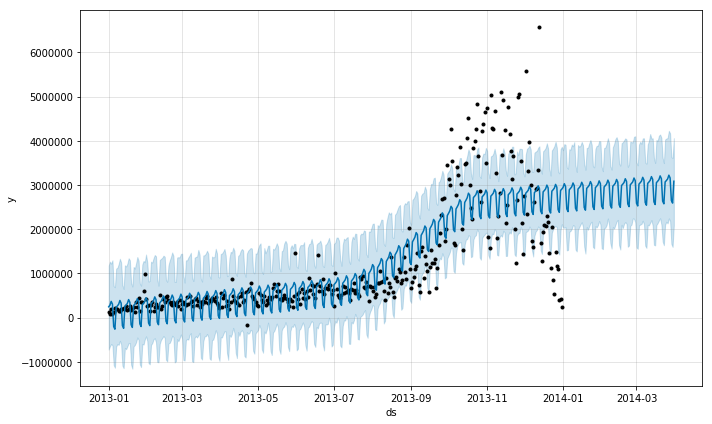

In [152]:
fig1 = model.plot(forecast)

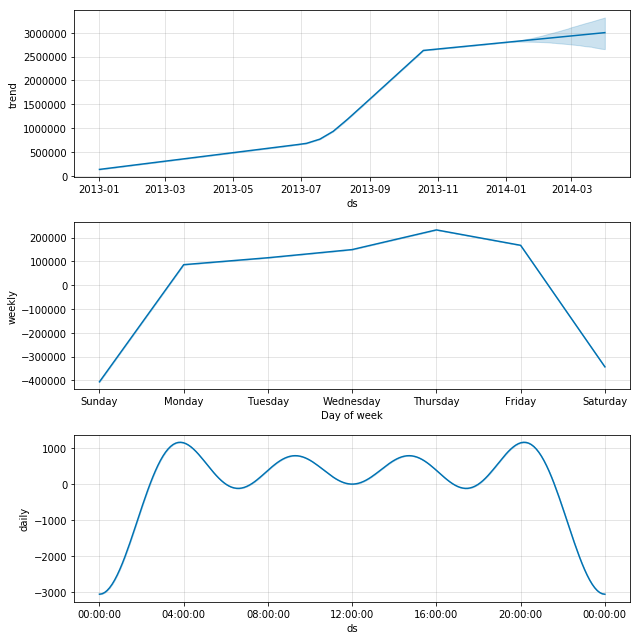

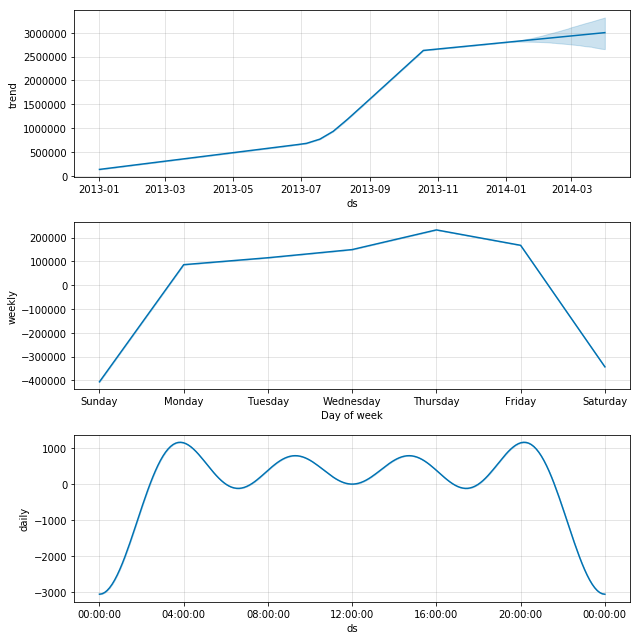

In [153]:
model.plot_components(forecast)

In [154]:
df = pd.concat([Local_Billings, forecast.set_index('ds')['yhat']], axis=1)

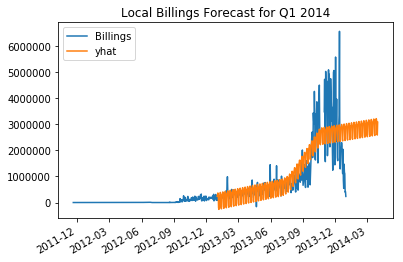

In [166]:
df.plot(title= 'Local Billings Forecast for Q1 2014', fontsize=10)